# What Makes a Hit Song? A Data-Driven Analysis of Music Popularity

## Understanding-Data

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway

In [18]:
df=pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [19]:
df.shape

(32833, 23)

In [20]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [22]:
df.duplicated().sum()

0

In [23]:
# Missing records in Columns count:-
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [24]:
# Missing Records:-
df[df.isna().any(axis=1)]      #Only 5 records missing.


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


## Data-Cleaning

In [25]:
# Dropping missing records:-
df.dropna(inplace=True)

In [26]:
# Changing Data-tupe Of Date_column:-
df['track_album_release_date']=pd.to_datetime(df['track_album_release_date'],errors='coerce',format='mixed')
                                             

## Exploratory-Data-Analysis

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
track_popularity,32828.0,42.483551,0.0,24.0,45.0,62.0,100.0,24.980476
track_album_release_date,32828,2011-08-07 13:48:28.687705600,1957-01-01 00:00:00,2008-08-21 12:00:00,2016-08-26 00:00:00,2019-04-19 00:00:00,2020-01-29 00:00:00,NaN
danceability,32828.0,0.65485,0.0,0.563,0.672,0.761,0.983,0.145092
energy,32828.0,0.698603,0.000175,0.581,0.721,0.84,1.0,0.180916
key,32828.0,5.373949,0.0,2.0,6.0,9.0,11.0,3.611572
loudness,32828.0,-6.719529,-46.448,-8.17125,-6.166,-4.645,1.275,2.988641
mode,32828.0,0.565737,0.0,0.0,1.0,1.0,1.0,0.495667
speechiness,32828.0,0.107053,0.0,0.041,0.0625,0.132,0.918,0.101307
acousticness,32828.0,0.175352,0.0,0.0151,0.0804,0.255,0.994,0.219644
instrumentalness,32828.0,0.08476,0.0,0.0,0.000016,0.00483,0.994,0.224245


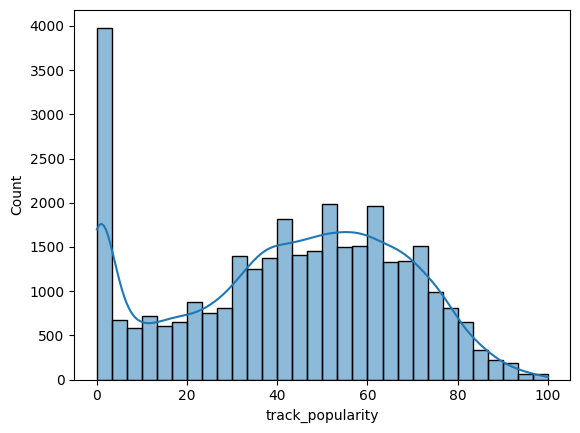

In [28]:
# Track Popularity Distribution:-
sns.histplot(data=df,x='track_popularity',kde=True,bins=30)
plt.show()

In [33]:
# Checking Outliers in track_popularity.
Q1 = df['track_popularity'].quantile(0.25)
Q3 = df['track_popularity'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['track_popularity'] < Q1 - 1.5 * IQR) |
    (df['track_popularity'] > Q3 + 1.5 * IQR)
]
outliers
                  # No outliers in track_popularity column

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


### Univariate-Analysis

In [37]:
# numeric Columns:-
num_cols = df.select_dtypes(include='number')
num_cols.columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

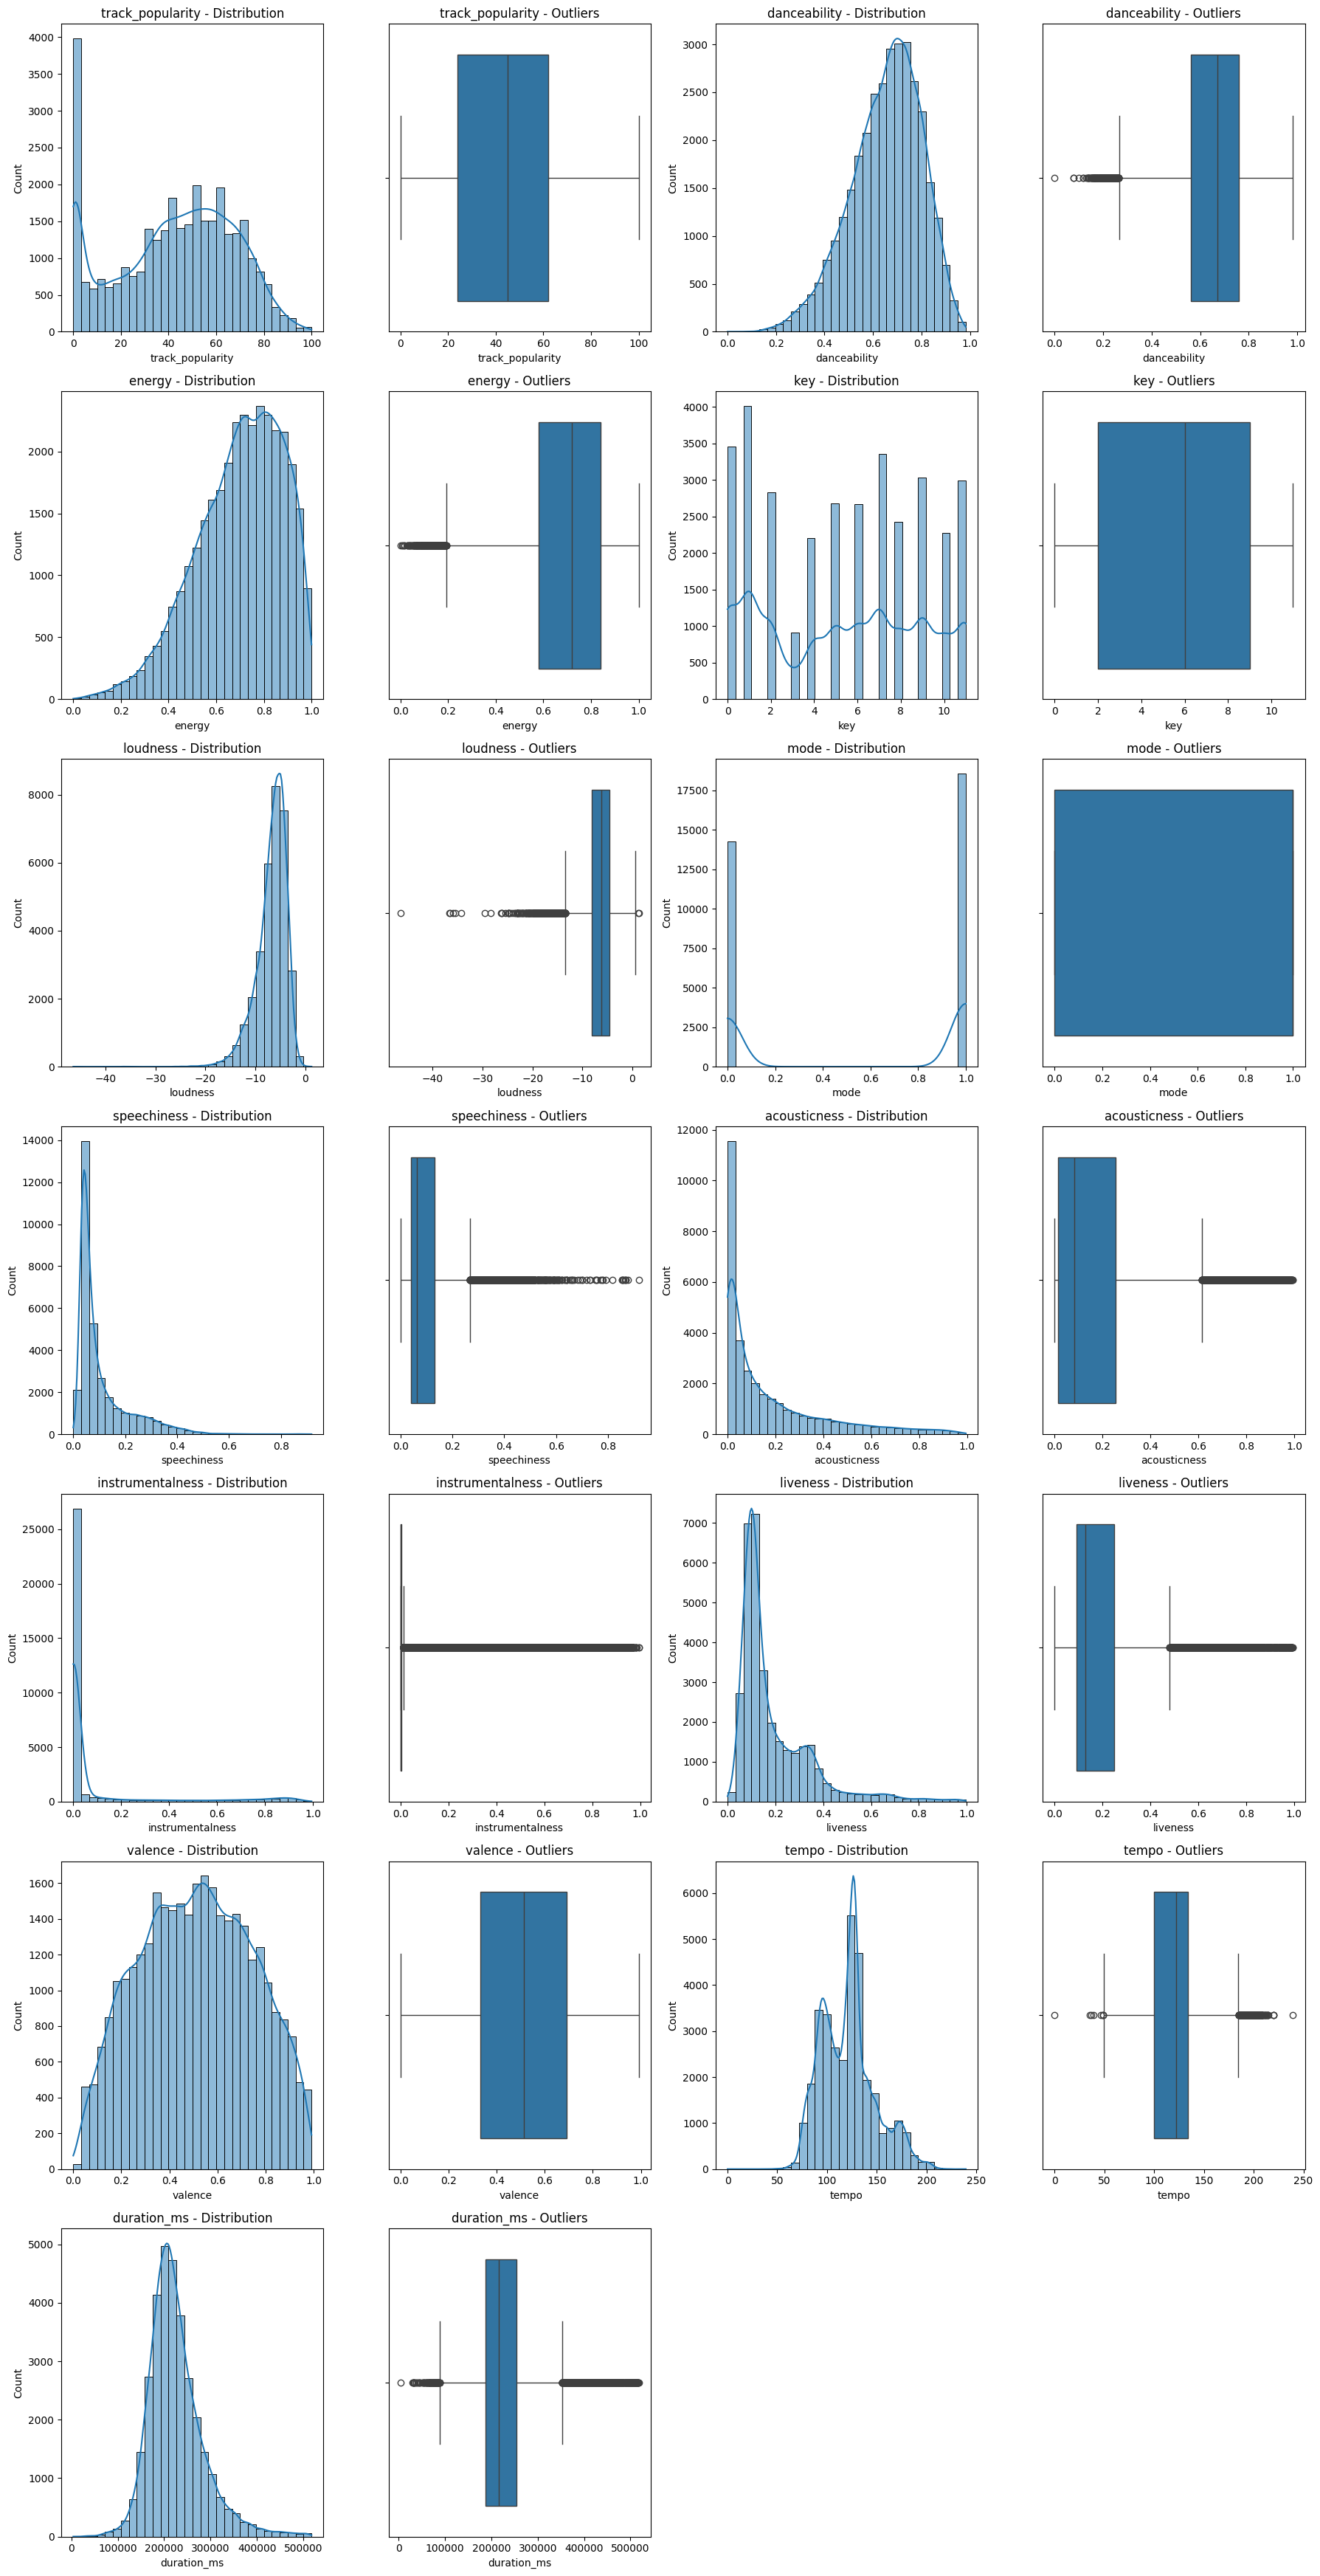

In [82]:
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_cols):
    # Histogram (left)
    plt.subplot(n_rows, n_cols * 2, i * 2 + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} - Distribution")

    # Boxplot (right)
    plt.subplot(n_rows, n_cols * 2, i * 2 + 2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Outliers")

plt.tight_layout()
plt.show()


- Univariate numeric analysis revealed that most features are non-normally distributed, with several variables exhibiting right skewness and meaningful outliers. Bounded audio features remained within valid ranges, indicating good data quality. Observed outliers correspond to real-world musical variations rather than anomalies, and were therefore retained for subsequent analysis.


### Uni-Variate For Categorical Cols:-

In [70]:
cat_cols=df.select_dtypes(include='object').nunique().sort_values()
cat_cols

playlist_genre           6
playlist_subgenre       24
playlist_name          449
playlist_id            471
track_artist         10692
track_album_name     19743
track_album_id       22543
track_name           23449
track_id             28352
dtype: int64

In [72]:
# Low Cardinality Columns:- Playlist_genre
df['playlist_genre'].value_counts(normalize=True)*100

# playlist_genre
# edm      18.408066
# rap      17.494212
# pop      16.775314
# r&b      16.543804
# latin    15.696966
# rock     15.081638
# Name: proportion, dtype: float64

playlist_genre
edm      18.408066
rap      17.494212
pop      16.775314
r&b      16.543804
latin    15.696966
rock     15.081638
Name: proportion, dtype: float64

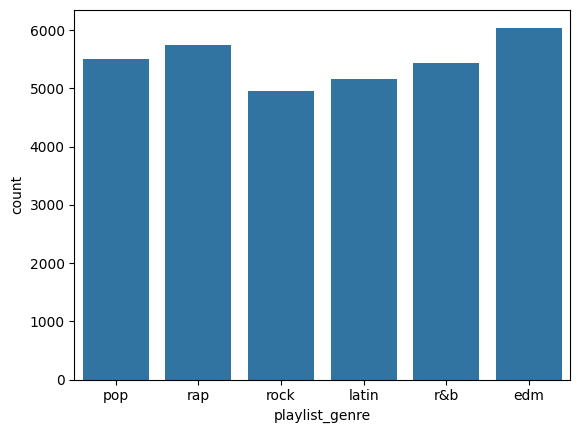

In [78]:
# Plot of Playlist_genre:-
sns.countplot(x='playlist_genre', data=df)
plt.show()


In [80]:
# Medium-Cardinality-Columns
# playlist_subgenre       24
# playlist_name          449

df['playlist_subgenre'].value_counts().head(10)

playlist_subgenre
progressive electro house    1809
southern hip hop             1674
indie poptimism              1672
latin hip hop                1655
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1456
electropop                   1408
Name: count, dtype: int64

In [81]:
# Top-10 Track_artists
df['track_artist'].value_counts().head(10)

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64

- Categorical univariate analysis revealed a well-balanced genre distribution with slight dominance of EDM and Rap. Subgenre analysis highlighted the prominence of electronic and hip-hop styles, indicating a focus on contemporary music trends. Artist-level data shows high diversity with over 10,000 unique contributors, preventing concentration bias.

### Bi-Variate -Analysis
##### Trying To answer What Makes a Track Popular..

In [86]:
# 1:- Track_popularity V/s Playlistgenre..
df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

playlist_genre
pop      47.744870
latin    47.044828
rap      43.238029
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64

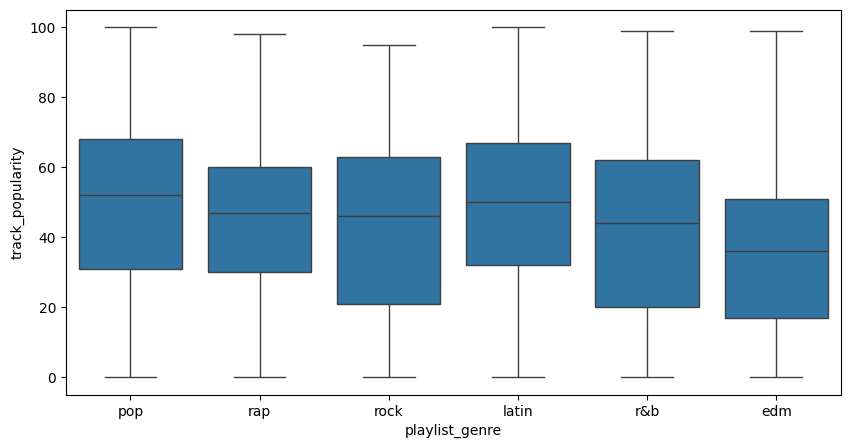

In [91]:
# plot:-
plt.figure(figsize=(10,5))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.show()

> While Pop and Latin genres show slightly higher median popularity, the substantial overlap across genres suggests that genre alone is not a strong predictor of track success. Popularity appears to be influenced by additional musical and contextual features.

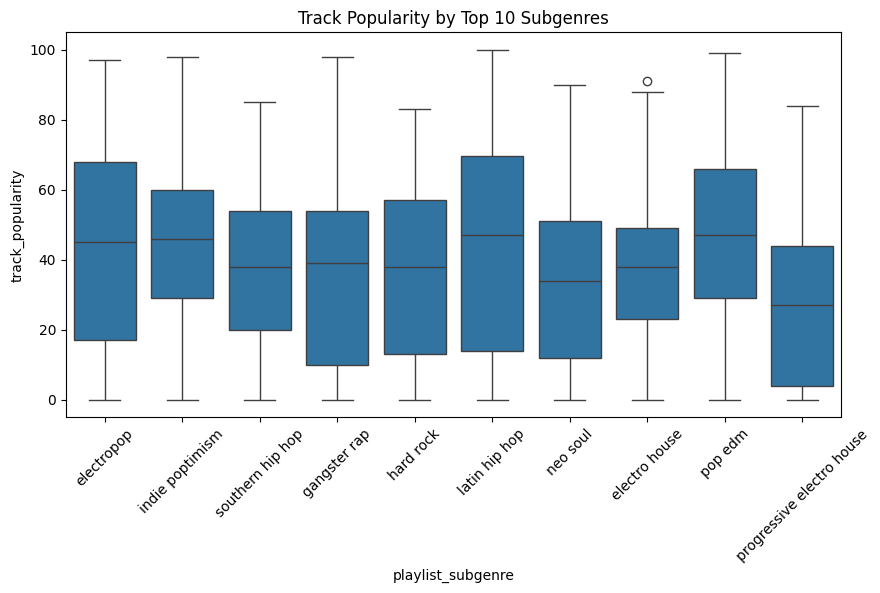

In [104]:
#2:- track_popularity V/s playlist_subgenre
top_sub = df['playlist_subgenre'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    x='playlist_subgenre',
    y='track_popularity',
    data=df[df['playlist_subgenre'].isin(top_sub)]
)
plt.xticks(rotation=45)
plt.title("Track Popularity by Top 10 Subgenres")
plt.show()

> Electronic and pop-fusion subgenres show higher popularity dispersion, indicating greater hit potential.

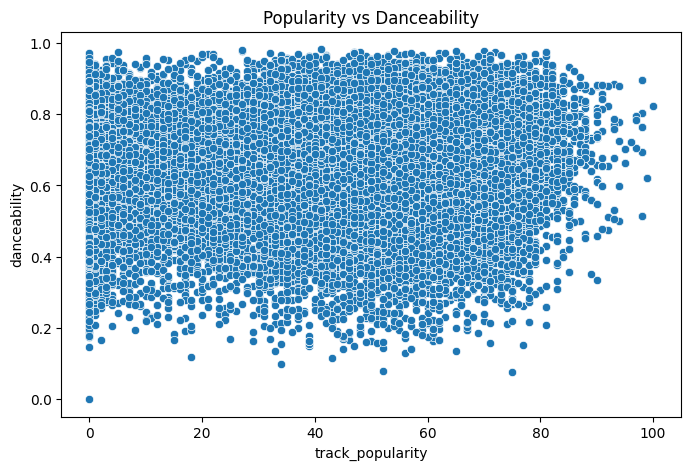

In [109]:
#3:-track_popularity vs Numerical Audio Features

#(A):- track_popularity V/s Daceability:-

plt.figure(figsize=(8,5))
sns.scatterplot(x='track_popularity',y='danceability',data=df)
plt.title("Popularity vs Danceability")
plt.show()

In [113]:
#B) Correlation Analysis Of Numeric Audio Features:-

corr_cols=['track_popularity','danceability','energy','valence','tempo','loudness','acousticness']

df[corr_cols].corr()['track_popularity'].sort_values(ascending=False)

track_popularity    1.000000
acousticness        0.085042
danceability        0.064754
loudness            0.057717
valence             0.033278
tempo              -0.005538
energy             -0.108984
Name: track_popularity, dtype: float64

>Correlation analysis shows that individual audio features have very weak linear relationships with track popularity. This suggests that popularity is likely driven by a combination of factors rather than any single musical attribute.

In [111]:
# 3:-track_popularity vs Mode
df.groupby('mode')['track_popularity'].mean()

mode
0    42.182660
1    42.714516
Name: track_popularity, dtype: float64

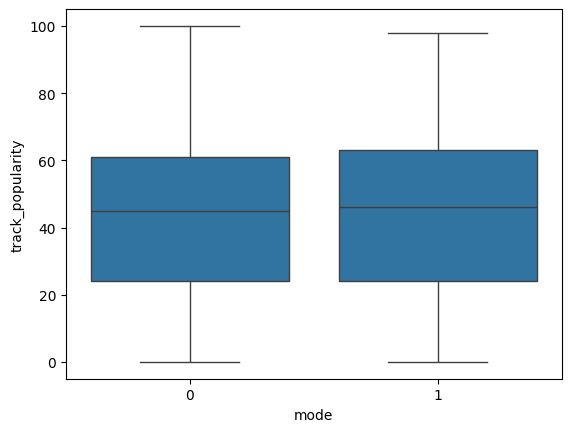

In [112]:
sns.boxplot(x='mode', y='track_popularity', data=df)
plt.show()

>Tracks in major mode have slightly higher average popularity

>The difference is very small (~0.5 points)

### Multivariate-Analysis 
##### multiple features together influence track popularity

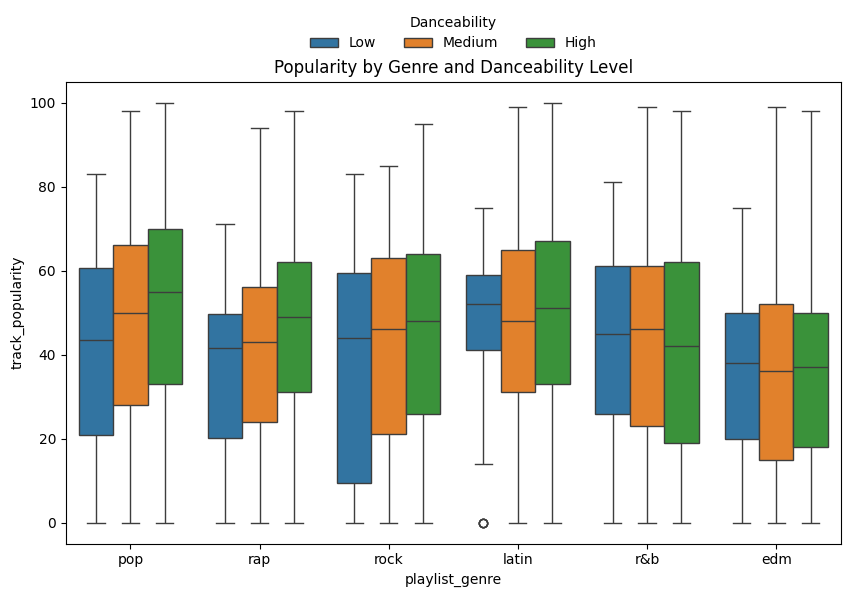

In [124]:
# 1:-Popularity vs Danceability across Genres
plt.figure(figsize=(10,6))
sns.boxplot(y='track_popularity',x='playlist_genre',hue=pd.cut(df['danceability'], bins=3, labels=['Low','Medium','High']),data=df)
plt.title("Popularity by Genre and Danceability Level")
plt.legend(title='Danceability',loc='upper center',bbox_to_anchor=(0.5, 1.17),ncol=3,frameon=False)
plt.show()

> higher danceability generally corresponds with increased track popularity across most genres, particularly in Pop and Latin music. However, the substantial overlap between danceability levels suggests that while rhythm and engagement contribute to success, popularity is influenced by a broader combination of musical and external factors

In [125]:
#2:- Binned Audio Features --> Popularity
df['energy_level']= pd.cut(df['energy'],bins=[0,0.33,0.66,1],labels=['Low','Medium','High'])

df.groupby('energy_level')['track_popularity'].mean()

C:\Users\hitesh\AppData\Local\Temp\ipykernel_20424\1290764479.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('energy_level')['track_popularity'].mean()


energy_level
Low       44.836957
Medium    44.927427
High      41.010950
Name: track_popularity, dtype: float64

>Tracks with medium energy levels achieve higher average popularity compared to very low or very high energy tracks.

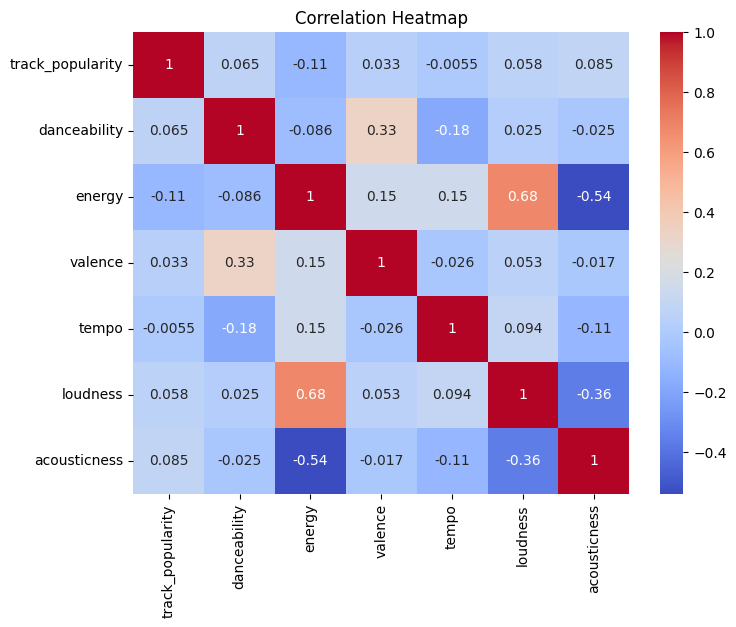

In [126]:
#3:-Correlation Heatmap
corr_cols = [
    'track_popularity','danceability','energy','valence','tempo','loudness','acousticness']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

>Correlation analysis revealed that track popularity has weak linear relationships with individual audio features. However,
>strong correlations were observed among audio attributes themselves, particularly between energy and loudness (0.68) and energy and acousticness (-0.54).
>This suggests that while audio features are structurally related, popularity is influenced by more complex, multifactorial dynamics.

### EDA Summary:-
##### 1:-The dataset is high quality and well-structured, with minimal missing values and valid ranges for all numerical audio features.

##### 2:-Track popularity follows a right-skewed distribution, indicating that only a small fraction of tracks achieve very high popularity.

##### 3:-Audio features such as danceability, energy, and valence show non-normal distributions, reflecting diverse musical styles in the dataset.

##### 4:-The dataset has a balanced genre distribution, with no single genre dominating, making it suitable for comparative analysis.

##### 5:-Bivariate analysis shows weak linear relationships between track popularity and individual audio features, suggesting popularity is not driven by a single musical attribute.

##### 6:-Multivariate analysis reveals that moderate to high danceability and energy levels tend to perform better across genres, though differences are not extreme.

##### 7:-Strong correlations exist among audio features themselves (e.g., energy–loudness, energy–acousticness), indicating feature interdependence.

##### 8:-Overall, track popularity appears to be multifactorial, influenced by a combination of musical characteristics and external factors such as artist popularity and exposure.

## Hypothesis Testing
#### H0 : Mean popularity is the same across all genres
#### H1 : At least one genre has a different mean popularity

In [133]:
# One-way-Anova(1 cat, 1 Numeric)

from scipy.stats import f_oneway
groups=[df[df['playlist_genre']==g]['track_popularity'] for g in df['playlist_genre'].unique()]

f_stat,p_value= f_oneway(*groups)

f_stat,p_value          # not enough evidense to accept the null hypothesis p<<0.05 --> rejected

(207.6152028952144, 1.0140836645377916e-218)

>A one-way ANOVA revealed a statistically significant difference in mean track popularity across genres (F = 207.62, p < 0.001). However, despite statistical significance, EDA showed substantial overlap between genres, suggesting that the practical effect of genre on popularity is limited.

## Hypothesis Testing 2:-
#### H0: Mean popularity is same for Low, Medium, High energy tracks
#### H1: At least one energy level differs

In [138]:
# One_way_anova(1 cat,1 num)
energy_groups=[df[df['energy_level']==e]['track_popularity'] for e in df['energy_level'].dropna().unique()]

f_stat,p_value= f_oneway(*energy_groups)

f_stat,p_value        #Reject the null hypothesis pval<<0.05

(94.87013862005186, 8.261242066217063e-42)

>here is a statistically significant difference in average popularity across energy levels

>Energy level has a real statistical effect on popularity

## Business Insights

### 1:- Genre alone is not a strong predictor of success
→ While genre differences are statistically significant, their practical impact is limited.
  ##### Recommendation: Don’t over-invest in a single genre expecting guaranteed success.

### 2:- Moderate energy and higher danceability improve hit potential
→ Tracks with medium energy and higher danceability consistently show better average popularity.
  ##### Recommendation: Producers and curators should favor tracks with balanced energy rather than extremes.

### 3:- Pop and Latin genres show slightly better average performance
→ These genres have marginally higher median popularity.
  ##### Recommendation: Playlist strategies can prioritize these genres for wider reach, while still maintaining diversity.

### 4:- Popularity is driven by multiple interacting factors
→ Audio features alone do not explain popularity well.
  ##### Recommendation: Combine musical attributes with marketing, artist reputation, and playlist exposure.

### 5:- Outliers represent real opportunities, not noise
→ Highly popular tracks exist across all genres.
 ##### Recommendation: Identify and promote exceptional tracks rather than relying only on averages.